In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import log
import sympy as sym

<function eulerforw at 0x000001EDE9D9E200>


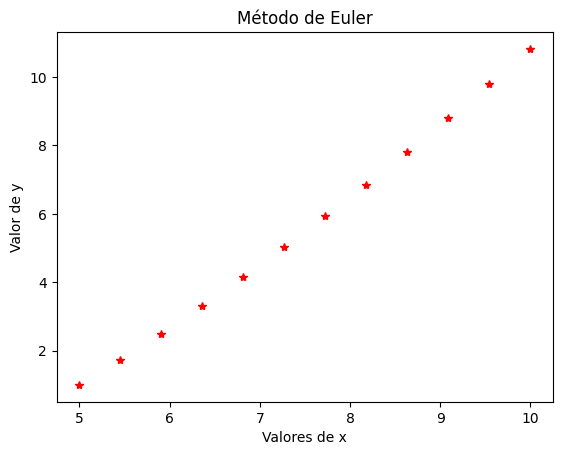

In [17]:
# Método de Euler hacia adelante
def eulerforw():
    x0 = 5
    y0 = 1
    xf = 10
    n = 12
    
    deltax = (xf - x0) / ( n-1) #fórmula
    x = np.linspace(x0, xf, n) #
    y = np.zeros([n])
    
    y[0] = y0
    for i in range(1, n):
            y[i] = deltax*(sym.log(x[i-1])) + y[i-1]
    return x, y

x, y = eulerforw()
print(eulerforw)
    #for i in range(n):
     #       print( x[i], y [i])
plt.plot(x, y, '*r')
plt.xlabel('Valores de x')
plt.ylabel('Valor de y')
plt.title('Método de Euler')
plt.show()

[0.05       0.09888889 0.14777778 0.19666667 0.24555556 0.29444444
 0.34333333 0.39222222 0.44111111 0.49      ]


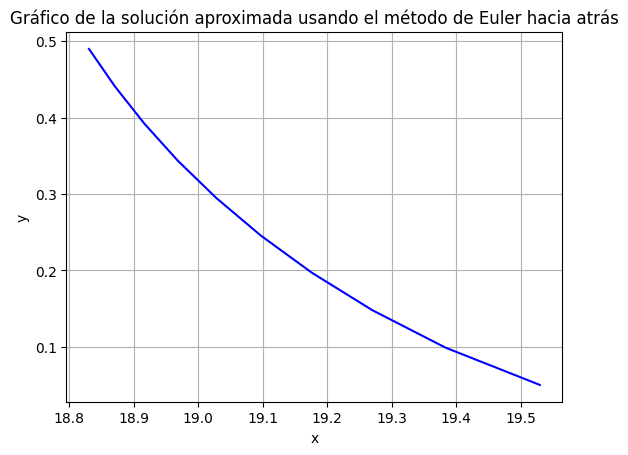

In [9]:
# Método de Euler hacia atrás
def f(x, y):
    return log(x)

def eulerbckw(f, a, b, n, yinit):
    h = (b - a)/(n-1)
    xs = a + np.arange(n)*h
    ys = np.zeros(n)
    y = yinit
    for j, x in enumerate(xs):
        ys[j] = y
        y += h*f(x, y)
    return ys, xs

a, b, n, yinit = 0.05, 0.49, 10, 19.53
xs, ys = eulerbckw(f, a, b, n, yinit); print(ys)

#Graficar
plt.plot(xs, ys, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de la solución aproximada usando el método de Euler hacia atrás')
plt.grid(True)
plt.show()

In [13]:
# resolución de EDO de manera analítica
# Definir la variable y la función
x = sym.Symbol('x')
y = sym.Function('y')(x)

# Definir la ecuación diferencial
E = sym.Eq(y.diff(x) - sym.log(x), 0)

# Resolver la ecuación diferencial
sol = sym.dsolve(E)
sol

Eq(y(x), C1 + x*log(x) - x)